In [1]:
from nltk_utils import Helper
import random
from gensim import models
import json
import pickle
import numpy as np
import tensorflow as tf
from string import punctuation
import pandas as pd
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os
# tf.config.set_visible_devices([], 'GPU')

2024-05-31 21:08:10.138680: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-31 21:08:10.138751: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-31 21:08:10.181881: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-31 21:08:10.280229: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-31 21:08:11.478545: W tensorflow/compiler/tf2

In [2]:

df = pd.read_csv('./assets/data.csv')
# df.head()

slang_df = pd.read_csv('./assets/slangs.csv')


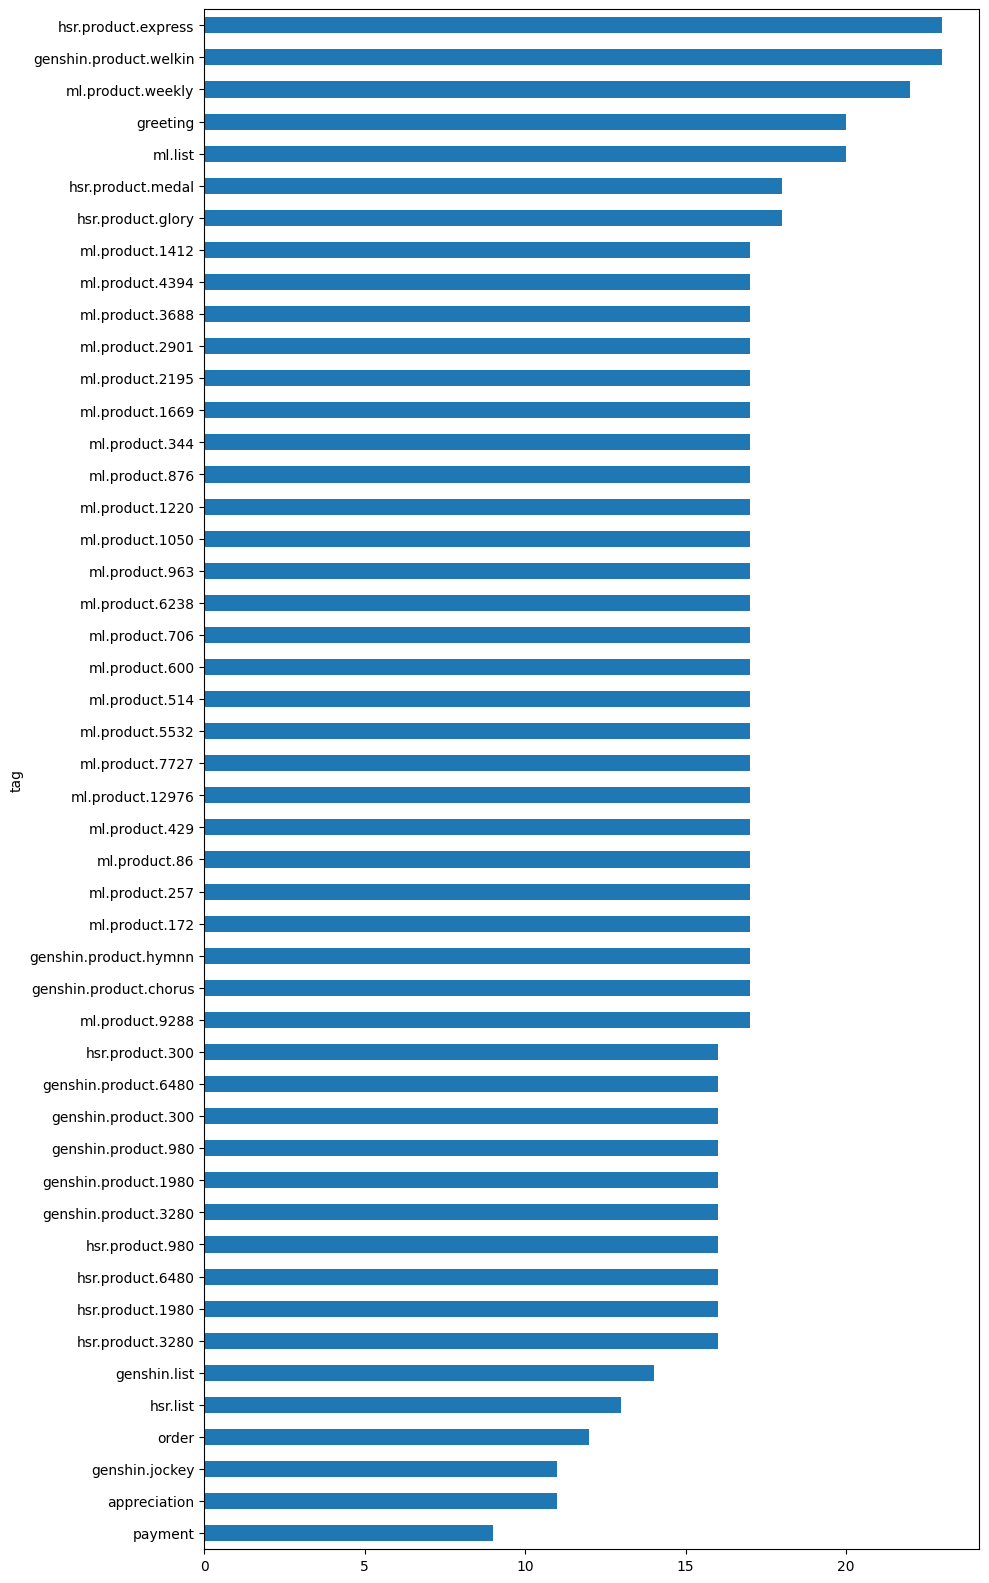

In [3]:
# import matplotlib.pyplot as plt
# fig , ax = plt.subplots(1,1)
# fig.set_size_inches(20,10)
# fig = df["tag"].value_counts().plot.barh(ax)

import matplotlib.pyplot as plt
fig , ax = plt.subplots(1,1)
fig.set_size_inches(10,20)
s = df["tag"].value_counts()
s = s.sort_values()
fig = s.plot.barh(ax)
fig.figure.savefig('./assets/tags.png')


## Preprocess

### Manage Slang words

In [4]:
helper = Helper()
patterns = df.pattern.values
tags = df.tag.values
removed_slangs = []
for text in patterns:
    removed_slangs.append(helper.slang_cleaning(text, slang_df))

removed_slangs

['hi',
 'hei',
 'halo',
 'selamat pagi',
 'selamat siang',
 'selamat sore',
 'halo admin mau tanya',
 'admin mau top up sudah buka belum',
 'sudah bisa topup admin ?',
 'halo kak',
 'kak , mau topup',
 'admin , mau topup ready kah ?',
 'hai admin',
 'ini dengan adeptushop ?',
 'permisi , ini benar dengan yang instagram nya adeptushop ?',
 'ini benar kontak nya adeptushop ?',
 'apa benar ini adeptushop ?',
 'yang adeptushop bukan ?',
 'ini yang toko topup bukan ?',
 'ini dengan adeptushop ya ?',
 'ini cara order nya bagaimana admin',
 'lewat uid atau apa ya ?',
 'lewat id atau apa ya ?',
 'pakai id teh admin ? ?',
 'via login apa uid bang ?',
 'meminta format order nya admin',
 'cara beli nya bagaimana ya ?',
 'jadi nya yang itu deh',
 'format nya bagaimana',
 'mau deh yang itu',
 'boleh deh yang itu',
 'mau beli admin , bagaimana format nya',
 'admin , transfer nya kemana ?',
 'transfer nya bagaimana ya bang',
 'bayar nya kemana ya ?',
 'bayar kemana bang',
 'lewat apa bayar nya ?',
 '

### Remove Stopwords

In [5]:
removed_stopwords = []
for text in removed_slangs:
    removed_stopwords.append(helper.stopword_removal(text))

removed_stopwords

['hi',
 'hei',
 'halo',
 'selamat pagi',
 'selamat siang',
 'selamat sore',
 'halo admin',
 'admin top up buka',
 'topup admin?',
 'halo kak',
 'kak, topup',
 'admin, topup ready kah?',
 'hai admin',
 'adeptushop?',
 'permisi, instagram adeptushop?',
 'kontak adeptushop?',
 'adeptushop?',
 'adeptushop?',
 'toko topup?',
 'adeptushop?',
 'order admin',
 'uid?',
 'id?',
 'pakai id teh admin??',
 'login uid bang?',
 'format order admin',
 'beli?',
 'deh',
 'format',
 'deh',
 'deh',
 'beli admin, format',
 'admin, transfer kemana?',
 'transfer bang',
 'bayar kemana?',
 'bayar kemana bang',
 'bayar?',
 'qris enggak?',
 'kemana transfer?',
 'pakai mandiri?',
 'no transfer',
 'pricelist genshin impact?',
 'pricelist harga genshin impact kak',
 'listnya admin, genshin impact',
 'pricelist genshin impact',
 'pricelist genshin impact admin',
 'genshin impact pricelist',
 'genshin impact',
 'daftar harga genshin impact kak',
 'lihat harga genshinnya kak?',
 'daftar genshin impact',
 'daftar harga

### Tokenize + Lowercasing

In [6]:

tokenized_text = []
for text in removed_stopwords:
    tokenized_text.append(helper.tokenize(text))

tokenized_text

[['hi'],
 ['hei'],
 ['halo'],
 ['selamat', 'pagi'],
 ['selamat', 'siang'],
 ['selamat', 'sore'],
 ['halo', 'admin'],
 ['admin', 'top', 'up', 'buka'],
 ['topup', 'admin', '?'],
 ['halo', 'kak'],
 ['kak', ',', 'topup'],
 ['admin', ',', 'topup', 'ready', 'kah', '?'],
 ['hai', 'admin'],
 ['adeptushop', '?'],
 ['permisi', ',', 'instagram', 'adeptushop', '?'],
 ['kontak', 'adeptushop', '?'],
 ['adeptushop', '?'],
 ['adeptushop', '?'],
 ['toko', 'topup', '?'],
 ['adeptushop', '?'],
 ['order', 'admin'],
 ['uid', '?'],
 ['id', '?'],
 ['pakai', 'id', 'teh', 'admin', '?', '?'],
 ['login', 'uid', 'bang', '?'],
 ['format', 'order', 'admin'],
 ['beli', '?'],
 ['deh'],
 ['format'],
 ['deh'],
 ['deh'],
 ['beli', 'admin', ',', 'format'],
 ['admin', ',', 'transfer', 'kemana', '?'],
 ['transfer', 'bang'],
 ['bayar', 'kemana', '?'],
 ['bayar', 'kemana', 'bang'],
 ['bayar', '?'],
 ['qris', 'enggak', '?'],
 ['kemana', 'transfer', '?'],
 ['pakai', 'mandiri', '?'],
 ['no', 'transfer'],
 ['pricelist', 'genshin

### Filtering

In [7]:
clean_patterns = []
for text in tokenized_text:
    clean_patterns.append(helper.remove_punctuations(text))

clean_patterns

[['hi'],
 ['hei'],
 ['halo'],
 ['selamat', 'pagi'],
 ['selamat', 'siang'],
 ['selamat', 'sore'],
 ['halo', 'admin'],
 ['admin', 'top', 'up', 'buka'],
 ['topup', 'admin'],
 ['halo', 'kak'],
 ['kak', 'topup'],
 ['admin', 'topup', 'ready', 'kah'],
 ['hai', 'admin'],
 ['adeptushop'],
 ['permisi', 'instagram', 'adeptushop'],
 ['kontak', 'adeptushop'],
 ['adeptushop'],
 ['adeptushop'],
 ['toko', 'topup'],
 ['adeptushop'],
 ['order', 'admin'],
 ['uid'],
 ['id'],
 ['pakai', 'id', 'teh', 'admin'],
 ['login', 'uid', 'bang'],
 ['format', 'order', 'admin'],
 ['beli'],
 ['deh'],
 ['format'],
 ['deh'],
 ['deh'],
 ['beli', 'admin', 'format'],
 ['admin', 'transfer', 'kemana'],
 ['transfer', 'bang'],
 ['bayar', 'kemana'],
 ['bayar', 'kemana', 'bang'],
 ['bayar'],
 ['qris', 'enggak'],
 ['kemana', 'transfer'],
 ['pakai', 'mandiri'],
 ['no', 'transfer'],
 ['pricelist', 'genshin', 'impact'],
 ['pricelist', 'harga', 'genshin', 'impact', 'kak'],
 ['listnya', 'admin', 'genshin', 'impact'],
 ['pricelist', 'gen

### Convert to Train data

In [8]:
tokenizer = Tokenizer(num_words=200)
tokenizer.fit_on_texts(clean_patterns)
train = tokenizer.texts_to_sequences(clean_patterns)
train

[[89],
 [90],
 [77],
 [78, 74],
 [78, 91],
 [78, 92],
 [77, 2],
 [2, 64, 65, 93],
 [3, 2],
 [77, 13],
 [13, 3],
 [2, 3, 14, 94],
 [95, 2],
 [71],
 [8, 96, 71],
 [97, 71],
 [71],
 [71],
 [98, 3],
 [71],
 [79, 2],
 [84],
 [85],
 [86, 85, 99, 2],
 [100, 84, 7],
 [80, 79, 2],
 [6],
 [31],
 [80],
 [31],
 [31],
 [6, 2, 80],
 [2, 75, 76],
 [75, 7],
 [81, 76],
 [81, 76, 7],
 [81],
 [101, 26],
 [76, 75],
 [86, 102],
 [103, 75],
 [28, 19, 20],
 [28, 12, 19, 20, 13],
 [82, 2, 19, 20],
 [28, 19, 20],
 [28, 19, 20, 2],
 [19, 20, 28],
 [19, 20],
 [59, 12, 19, 20, 13],
 [83, 12, 104, 13],
 [59, 19, 20],
 [59, 12, 19, 20, 2],
 [74, 66, 59, 12, 19, 20],
 [66, 28, 19, 20],
 [66, 59, 12, 19, 20],
 [12, 72, 19, 20],
 [72],
 [63],
 [72, 13],
 [62, 19, 20],
 [63],
 [62, 19, 20],
 [63],
 [62, 19, 20],
 [64, 65, 63],
 [64, 65, 62, 19, 20, 2],
 [2, 6, 63],
 [2, 6, 63],
 [2, 6, 62, 19, 20],
 [63, 15],
 [62, 19, 20, 15],
 [63, 14, 26],
 [62, 19, 20, 14, 26],
 [63, 2],
 [72, 2],
 [72, 7],
 [8, 3, 72],
 [8, 3, 63]

In [9]:
# cls = []
# category = pd.unique(tags)
# category = category.tolist()
# for i in range(len(tags)):
#     one_hot = np.zeros((len(category),), dtype=int)
#     idx = category.index(tags[i])
#     one_hot[idx] = 1
#     cls.append(one_hot)
# cls = np.array(cls)
# cls


In [10]:
# tags = dict()
# for i in range(len(category)) :
#     tags[i] = category[i]
# tags
df.tag.values

array(['greeting', 'greeting', 'greeting', 'greeting', 'greeting',
       'greeting', 'greeting', 'greeting', 'greeting', 'greeting',
       'greeting', 'greeting', 'greeting', 'greeting', 'greeting',
       'greeting', 'greeting', 'greeting', 'greeting', 'greeting',
       'order', 'order', 'order', 'order', 'order', 'order', 'order',
       'order', 'order', 'order', 'order', 'order', 'payment', 'payment',
       'payment', 'payment', 'payment', 'payment', 'payment', 'payment',
       'payment', 'genshin.list', 'genshin.list', 'genshin.list',
       'genshin.list', 'genshin.list', 'genshin.list', 'genshin.list',
       'genshin.list', 'genshin.list', 'genshin.list', 'genshin.list',
       'genshin.list', 'genshin.list', 'genshin.list',
       'genshin.product.welkin', 'genshin.product.welkin',
       'genshin.product.welkin', 'genshin.product.welkin',
       'genshin.product.welkin', 'genshin.product.welkin',
       'genshin.product.welkin', 'genshin.product.welkin',
       'genshin.

In [11]:
word_index = tokenizer.word_index
print('unique tokens: ' + str(len(word_index)))
# word_index

unique tokens: 115


In [12]:

f = open('assets/tokenizer.pickle', 'wb')
pickle.dump(tokenizer, f)
f.close()

In [13]:
# hyper params
max_len=20
output_dim=300

In [14]:
train = pad_sequences(train, maxlen=20)
train
# len(tags)

array([[ 0,  0,  0, ...,  0,  0, 89],
       [ 0,  0,  0, ...,  0,  0, 90],
       [ 0,  0,  0, ...,  0,  0, 77],
       ...,
       [ 0,  0,  0, ...,  0, 67, 68],
       [ 0,  0,  0, ...,  0, 67, 68],
       [ 0,  0,  0, ..., 67, 68,  2]], dtype=int32)

### Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
cls = []
kategori_list = pd.unique(df.tag.values)
kategori_list = kategori_list.tolist()
for i in range(len(tags)):
    one_hot = np.zeros((len(kategori_list),), dtype=int)
    idx = kategori_list.index(tags[i])
    one_hot[idx] = 1
    cls.append(one_hot)
cls = np.array(cls)
encoder = LabelEncoder()
# temp_tag = pd.unique(tags).tolist()
labels = encoder.fit_transform(kategori_list)
print(labels)
print(cls)
tags = dict()
for i in range(len(kategori_list)) :
    tags[i] = kategori_list[i]
print(tags)

f = open('assets/tags.pickle', 'wb')
pickle.dump(tags, f)
f.close()

[11 46 47  2 10  4  7  3  5  6  9  8  1 12 18 14 17 13 15 16 19 20 21 45
 41 27 29 31 33 35 37 39 42 44 22 23 25 26 28 30 32 34 36 38 40 43 24  0]
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
{0: 'greeting', 1: 'order', 2: 'payment', 3: 'genshin.list', 4: 'genshin.product.welkin', 5: 'genshin.product.300', 6: 'genshin.product.980', 7: 'genshin.product.1980', 8: 'genshin.product.3280', 9: 'genshin.product.6480', 10: 'genshin.product.hymnn', 11: 'genshin.product.chorus', 12: 'genshin.jockey', 13: 'hsr.list', 14: 'hsr.product.express', 15: 'hsr.product.300', 16: 'hsr.product.980', 17: 'hsr.product.1980', 18: 'hsr.product.3280', 19: 'hsr.product.6480', 20: 'hsr.product.glory', 21: 'hsr.product.medal', 22: 'ml.list', 23: 'ml.product.weekly', 24: 'ml.product.86', 25: 'ml.product.172', 26: 'ml.product.257', 27: 'ml.product.344', 28: 'ml.product.429', 29: 'ml.product.514', 30: 'ml.product.600', 31: 'ml.product.706', 32:

### Embedding

In [16]:
word2vec_path = './idwiki_word2vec_300_new.txt'
word2vec = models.KeyedVectors.load_word2vec_format(word2vec_path)
train_embedding_weights = np.zeros((len(word_index)+1, output_dim))
for word,index in word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(output_dim)
print(train_embedding_weights.shape)

(116, 300)


### Create Model

In [17]:
from sklearn.model_selection import train_test_split
num_words = len(word_index)+1

X_train, X_test, y_train, y_test = train_test_split(train, cls, test_size=0.2, random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
# pembanding RNN BiLSTM GRU
# data acuisation
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, 
                              output_dim,
                              weights=[train_embedding_weights],
                              input_length=max_len),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(labels), activation='softmax')
])
# sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
# model
# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])

model.summary()

2024-05-31 21:09:17.988542: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-31 21:09:18.139889: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-31 21:09:18.139954: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-31 21:09:18.143120: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-31 21:09:18.143194: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 300)           34800     
                                                                 
 lstm (LSTM)                 (None, 128)               219648    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 48)                3120      
                                                                 
Total params: 265824 (1.01 MB)
Trainable params: 265824 

In [18]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
batch_size = 32
num_epochs = 200
# early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=20)
# model_save = ModelCheckpoint('model_lstm.hdf5', save_best_only= True, verbose=0)
hist = model.fit(
    X_train,
    y_train, 
    epochs=num_epochs,  
    shuffle=True,
    validation_data=(X_test, y_test),
    batch_size=batch_size
    # callbacks=[model_save]
    )
# tf.saved_model.save(model, "chatbot")
model.save("chatbot_model.h5")
# model.save("chatbot_model_py")
test_loss, test_acc = model.evaluate(X_test, y_test)



Epoch 1/200


2024-05-31 21:09:21.072147: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-05-31 21:09:21.983484: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fb27c01ac20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-31 21:09:21.983556: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti with Max-Q Design, Compute Capability 7.5
2024-05-31 21:09:21.998200: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1717164562.126270   43813 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 [==============================] - 5s 98ms/step - loss: 3.8596 - acc: 0.0407 - val_loss: 3.7430 - val_acc: 0.1125
Epoch 2/200
20/20 [==============================] - 1s 47ms/step - loss: 3.6649 - acc: 0.1095 - val_loss: 3.5797 - val_acc: 0.1688
Epoch 3/200
20/20 [==============================] - 1s 35ms/step - loss: 3.4696 - acc: 0.1377 - val_loss: 3.3599 - val_acc: 0.2000
Epoch 4/200
20/20 [==============================] - 0s 16ms/step - loss: 3.1656 - acc: 0.2034 - val_loss: 3.0846 - val_acc: 0.2375
Epoch 5/200
20/20 [==============================] - 1s 29ms/step - loss: 2.9590 - acc: 0.2113 - val_loss: 2.8025 - val_acc: 0.3250
Epoch 6/200
20/20 [==============================] - 0s 16ms/step - loss: 2.6666 - acc: 0.2833 - val_loss: 2.5135 - val_acc: 0.3875
Epoch 7/200
20/20 [==============================] - 0s 16ms/step - loss: 2.3775 - acc: 0.3318 - val_loss: 2.2636 - val_acc: 0.4875
Epoch 8/200
20/20 [==============================] - 0s 17ms/step - loss: 2.0951 - acc: 

/home/ihsan/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
from sklearn.metrics import f1_score,confusion_matrix, recall_score, precision_score
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Convert y_test from one-hot encoding to class labels if necessary
y_test_classes = y_test.argmax(axis=1)
# matrix = confusion_matrix(y_test_classes, y_pred_classes)
# print("Matrix ", matrix)
# Calculate F1 score
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes,average='weighted',zero_division=0)
precision = precision_score(y_test_classes, y_pred_classes,average='weighted')
print("Accuracy:", test_acc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

5/5 [==============================] - 0s 4ms/step
Accuracy: 0.949999988079071
Precision:  0.9706250000000001
Recall:  0.95
F1 Score:  0.9512784090909092


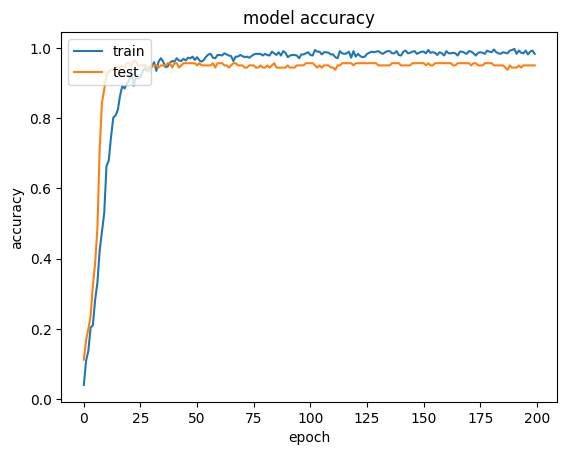

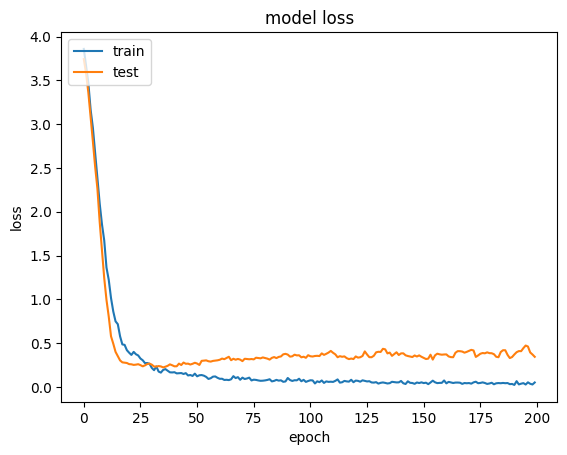

In [20]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Compare to RNN

In [21]:
model_rnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, 
                              output_dim,
                              weights=[train_embedding_weights],
                              input_length=max_len),
    tf.keras.layers.SimpleRNN(128),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(labels), activation='softmax')
])

model_rnn.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])

model_rnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 300)           34800     
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               54912     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 48)                3120      
                                                                 
Total params: 101088 (394.88 KB)
Trainable params: 101

In [22]:
model_rnn.fit(
    X_train,
    y_train, 
    epochs=num_epochs,  
    shuffle=True,
    validation_data=(X_test, y_test),
    batch_size=batch_size
    )
test_loss, test_acc = model_rnn.evaluate(X_test, y_test)

Epoch 1/200
20/20 [==============================] - 3s 98ms/step - loss: 4.1718 - acc: 0.0297 - val_loss: 3.8163 - val_acc: 0.0250
Epoch 2/200
20/20 [==============================] - 1s 53ms/step - loss: 3.8909 - acc: 0.0704 - val_loss: 3.7191 - val_acc: 0.0750
Epoch 3/200
20/20 [==============================] - 1s 54ms/step - loss: 3.7600 - acc: 0.0704 - val_loss: 3.6660 - val_acc: 0.1437
Epoch 4/200
20/20 [==============================] - 1s 48ms/step - loss: 3.5692 - acc: 0.1189 - val_loss: 3.5782 - val_acc: 0.1375
Epoch 5/200
20/20 [==============================] - 1s 48ms/step - loss: 3.5033 - acc: 0.1377 - val_loss: 3.5158 - val_acc: 0.1250
Epoch 6/200
20/20 [==============================] - 1s 53ms/step - loss: 3.3843 - acc: 0.1330 - val_loss: 3.4112 - val_acc: 0.1500
Epoch 7/200
20/20 [==============================] - 1s 52ms/step - loss: 3.2571 - acc: 0.1878 - val_loss: 3.2966 - val_acc: 0.1688
Epoch 8/200
20/20 [==============================] - 1s 53ms/step - loss: 3.

In [23]:
y_pred = model_rnn.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Convert y_test from one-hot encoding to class labels if necessary
y_test_classes = y_test.argmax(axis=1)
# matrix = confusion_matrix(y_test_classes, y_pred_classes)
# print("Matrix ", matrix)
# Calculate F1 score
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes,average='weighted',zero_division=0)
precision = precision_score(y_test_classes, y_pred_classes,average='weighted')
print("Accuracy:", test_acc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

5/5 [==============================] - 0s 9ms/step
Accuracy: 0.9437500238418579
Precision:  0.9527232142857143
Recall:  0.94375
F1 Score:  0.9431715506715508


### BiLSTM

In [24]:
model_bilstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, 
                              output_dim,
                              weights=[train_embedding_weights],
                              input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(labels), activation='softmax')
])
# sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model_bilstm.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])

model_bilstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 300)           34800     
                                                                 
 bidirectional (Bidirection  (None, 256)               439296    
 al)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 48)                3120      
                                                      

In [25]:
model_bilstm.fit(
    X_train,
    y_train, 
    epochs=num_epochs,  
    shuffle=True,
    validation_data=(X_test, y_test),
    batch_size=batch_size
    )
test_loss, test_acc = model_bilstm.evaluate(X_test, y_test)

Epoch 1/200
20/20 [==============================] - 5s 91ms/step - loss: 3.8589 - acc: 0.0266 - val_loss: 3.7777 - val_acc: 0.1250
Epoch 2/200
20/20 [==============================] - 1s 42ms/step - loss: 3.7066 - acc: 0.0782 - val_loss: 3.5895 - val_acc: 0.1937
Epoch 3/200
20/20 [==============================] - 1s 30ms/step - loss: 3.4365 - acc: 0.1518 - val_loss: 3.2686 - val_acc: 0.2375
Epoch 4/200
20/20 [==============================] - 1s 25ms/step - loss: 3.1550 - acc: 0.1690 - val_loss: 2.9273 - val_acc: 0.2375
Epoch 5/200
20/20 [==============================] - 0s 23ms/step - loss: 2.8198 - acc: 0.2410 - val_loss: 2.6090 - val_acc: 0.3250
Epoch 6/200
20/20 [==============================] - 0s 23ms/step - loss: 2.5235 - acc: 0.3083 - val_loss: 2.3603 - val_acc: 0.4500
Epoch 7/200
20/20 [==============================] - 1s 27ms/step - loss: 2.2499 - acc: 0.3772 - val_loss: 2.0324 - val_acc: 0.5500
Epoch 8/200
20/20 [==============================] - 0s 21ms/step - loss: 1.

In [26]:
y_pred = model_bilstm.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Convert y_test from one-hot encoding to class labels if necessary
y_test_classes = y_test.argmax(axis=1)
# matrix = confusion_matrix(y_test_classes, y_pred_classes)
# print("Matrix ", matrix)
# Calculate F1 score
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes,average='weighted',zero_division=0)
precision = precision_score(y_test_classes, y_pred_classes,average='weighted')
print("Accuracy:", test_acc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

5/5 [==============================] - 1s 7ms/step
Accuracy: 0.9437500238418579
Precision:  0.9562648809523809
Recall:  0.94375
F1 Score:  0.9426222735597735


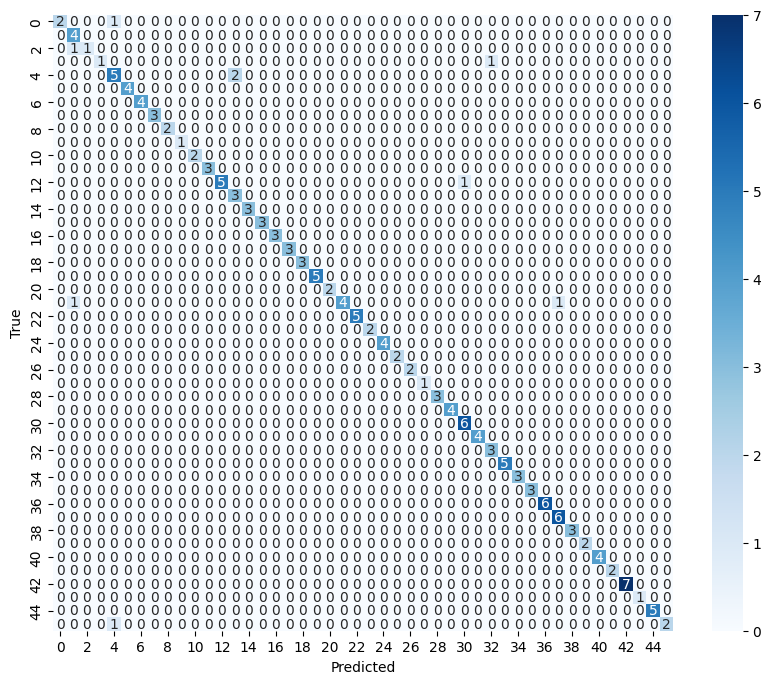

In [27]:

import seaborn as sns
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Cross Validation

In [28]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
acc = []
loss = []
X = np.array(train)
y = cls
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(num_words, 
                                output_dim,
                                weights=[train_embedding_weights],
                                input_length=max_len),
        tf.keras.layers.LSTM(128),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(labels), activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])
    model.fit(
        X_train,
        y_train, 
        epochs=num_epochs,  
        verbose=0
    )
    score = model.evaluate(X_test, y_test, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[0], score[0]*100))
    print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
    loss.append(score[0] * 100)
    acc.append(score[1] * 100)

print("avg loss = %.2f%% (+/- %.2f%%)" % (np.mean(loss), np.std(loss)))
print("avg acc = %.2f%% (+/- %.2f%%)" % (np.mean(acc), np.std(acc)))

loss: 39.03%
acc: 95.00%
loss: 7.38%
acc: 98.75%
loss: 6.53%
acc: 99.37%
loss: 4.06%
acc: 98.75%
loss: 13.58%
acc: 98.74%
avg loss = 14.11% (+/- 12.84%)
avg acc = 98.12% (+/- 1.58%)
